In [39]:
data_base_dir = r"C:\Users\13126\Desktop\RR1_Cleaned.txt"


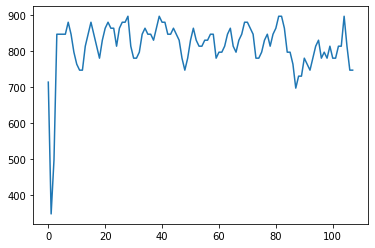

In [45]:
test_rr = np.genfromtxt(data_base_dir) * 1000
plt.plot(test_rr)

bins: 12
Baevsky’s stress index : 39.941902687000734
SI: 6.319960655494679
MxDMn 600.0
Mo 850.0
AMo 0.4074074074074074


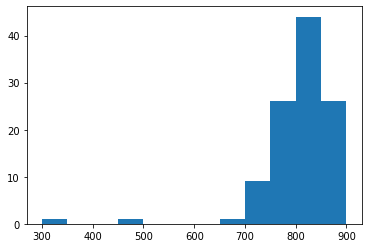

In [48]:
bins, max_RR_JJ_ceil_50, min_RR_JJ_floor_50 = calculate_hist_range_with_50ms_bin(test_rr)
print("bins:", bins)
n_list, bins, _ = plt.hist(test_rr, bins=bins, range=(min_RR_JJ_floor_50, max_RR_JJ_ceil_50))

# compute SI
MxDMn = max_RR_JJ_ceil_50 - min_RR_JJ_floor_50
Mo = np.argmax(n_list) * 50 + min_RR_JJ_floor_50 + 50
AMo = np.max(n_list) / np.sum(n_list)
SI = AMo / (2*(Mo/1000) * (MxDMn/1000)) * 100 # 关键点在于乘以100
SI = np.sqrt(SI)
print("Baevsky’s stress index :", SI*SI)
print("SI:", SI)
print("MxDMn",MxDMn)
print("Mo",Mo)
print("AMo",AMo)

In [36]:
import os
import sys
import numpy as np
import pandas as pd

# import signal_analysis

import matplotlib.pyplot as plt

from IPython.display import display

from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values


In [37]:
data_base_dir = r"C:\Users\13126\Desktop\BCG_serialport_ecg\data\采集数据"
dataset_list = ['data_2021-04-28-16-18-17_xyc',
                'data_2021-05-18-21-14-19_hcq',
                'data_2021-05-17-21-45-51_mty_yj',
                'data_2021-05-17-22-08-37_shq_zzm',
                'data_2021-04-28-18-02-45_yf',
                'data_2021-05-18-21-28-29_ljr_jw',
                'data_2021-04-26-23-26-01']

In [38]:
def read_RR_JJ(filepath, filename, mode="RR"):
    filename = filename + "_" + mode + ".txt"
    file_str = os.path.join(filepath, filename)
    RR_JJ_array = np.genfromtxt(file_str)
    return RR_JJ_array

def preprocess_RR_JJ_array(rr_intervals_list):
     # This remove outliers from signal
    rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_intervals_list,
                                                    low_rri=300, high_rri=2000)

    # This replace outliers nan values with linear interpolation
    interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                       interpolation_method="linear")

    # This remove ectopic beats from signal, 将ectopic值替换为nan
    nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")

    # This replace ectopic beats nan values with linear interpolation
    interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
    
    return interpolated_nn_intervals

def calculate_hist_range_with_50ms_bin(RR_JJ_array):
    max_RR_JJ = np.max(RR_JJ_array)
    min_RR_JJ = np.min(RR_JJ_array)    
    
    # max 以50为节点， 向上取整
    max_RR_JJ_ceil_50 =  max_RR_JJ // 50 * 50 if max_RR_JJ%50 == 0 else (max_RR_JJ//50 + 1)*50 
    # min 以50为节点， 向下取整
    min_RR_JJ_floor_50 =  min_RR_JJ // 50 * 50
    
    bins = (max_RR_JJ_ceil_50 - min_RR_JJ_floor_50) // 50
    
    return np.int(bins), max_RR_JJ_ceil_50, min_RR_JJ_floor_50

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
data_2021-04-28-16-18-17_xyc
shape of RR_JJ_array: (367,)
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
shape of RR_JJ_array: (367,)
bins: 8
Baevsky’s stress index : 57.63990777614756
SI: 7.592095084767284
MxDMn 400.0
Mo 650.0
AMo 0.2997275204359673
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
data_2021-05-18-21-14-19_hcq
shape of RR_JJ_array: (561,)
0 outlier(s) have been deleted.
5 ectopic beat(s) have been deleted with malik rule.
shape of RR_JJ_array: (561,)
bins: 7
Baevsky’s stress index : 91.67303284950344
SI: 9.574603534846936
MxDMn 350.0
Mo 750.0
AMo 0.48128342245989303
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
data_2021-05-17-21-45-51_mty_yj
shape of RR_JJ_array: (621,)
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
shape of RR_JJ_array: (621,)
bins: 6
Baevsky’s stress index : 97.8570543787935
SI: 9.8922724

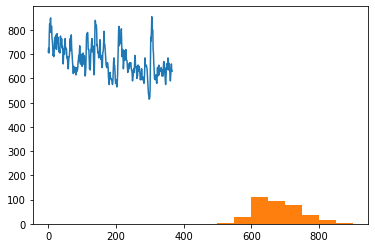

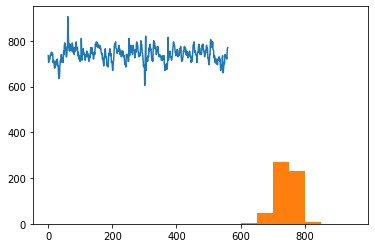

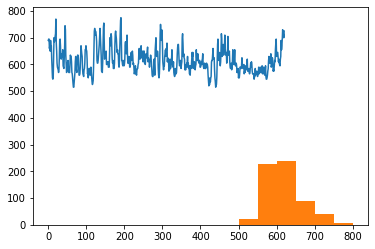

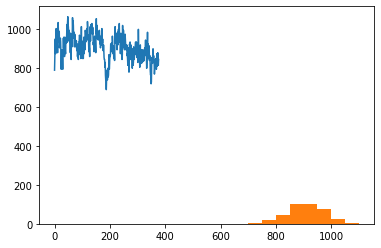

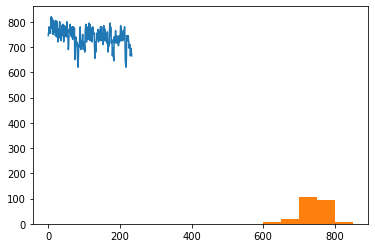

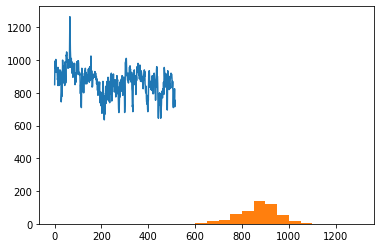

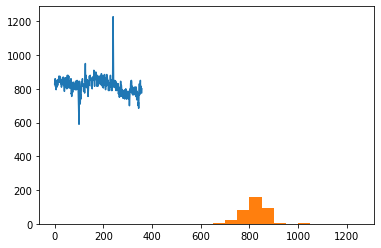

In [35]:
bins_list = []
max_RR_JJ_ceil_50_list = []
min_RR_JJ_floor_50_list = []
RR_JJ_array_list = []

for filename in dataset_list:
    print(">>"*30)
    print(filename)
    RR_JJ_array = read_RR_JJ(data_base_dir, filename, mode="RR")
    print("shape of RR_JJ_array:", RR_JJ_array.shape)
    RR_JJ_array = np.array(preprocess_RR_JJ_array(RR_JJ_array))
    print("shape of RR_JJ_array:", RR_JJ_array.shape)
    RR_JJ_array_list.append(RR_JJ_array)
    
    plt.figure()
    plt.plot(RR_JJ_array)
    
    
    
    
    bins, max_RR_JJ_ceil_50, min_RR_JJ_floor_50 = calculate_hist_range_with_50ms_bin(RR_JJ_array)
    print("bins:", bins)
    n_list, bins, _ = plt.hist(RR_JJ_array, bins=bins, range=(min_RR_JJ_floor_50, max_RR_JJ_ceil_50))

    # compute SI
    MxDMn = max_RR_JJ_ceil_50 - min_RR_JJ_floor_50
    Mo = np.argmax(n_list) * 50 + min_RR_JJ_floor_50 + 50
    AMo = np.max(n_list) / np.sum(n_list)
    SI = AMo / (2*(Mo/1000) * (MxDMn/1000)) * 100 # 关键点在于乘以100
    SI = np.sqrt(SI)
    print("Baevsky’s stress index :", SI*SI)
    print("SI:", SI)
    print("MxDMn",MxDMn)
    print("Mo",Mo)
    print("AMo",AMo)
    
    
    
    bins_list.append(bins)
    max_RR_JJ_ceil_50_list.append(max_RR_JJ_ceil_50)
    min_RR_JJ_floor_50_list.append(min_RR_JJ_floor_50)
    RR_JJ_array_list.append(RR_JJ_array)

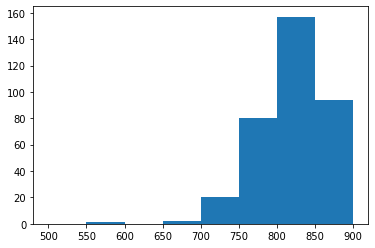

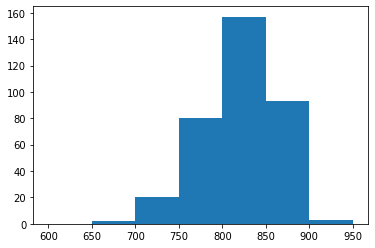

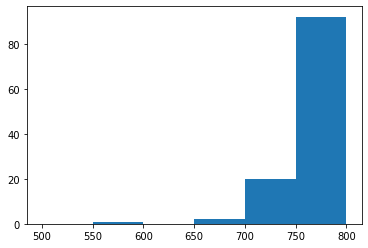

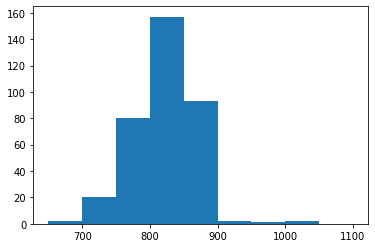

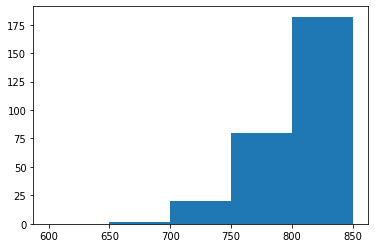

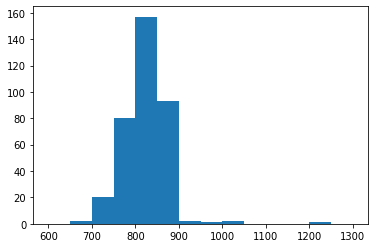

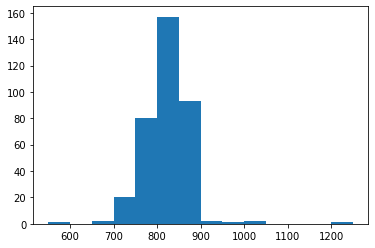

In [24]:
for i in range(len(bins_list)):
    plt.figure()
    plt.hist(RR_JJ_array, bins=bins_list[i], range=(min_RR_JJ_floor_50_list[i], max_RR_JJ_ceil_50_list[i]))

In [27]:
n_list

array([  1.,   0.,   2.,  20.,  80., 157.,  93.,   2.,   1.,   2.,   0.,
         0.,   0.,   1.])